# Customer-Segmentation 

#### Customer segmentation helps malls define customer needs and wants more precisely.

## 1- Using Kmeans

### Import important libraries and load data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Use the filterwarnings function to filter out specific warning messages
warnings.filterwarnings("ignore")

In [2]:
# read data
df=pd.read_csv(r"Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### data cleaning and preprocessing

In [3]:
print (df.info())
print ("------------------------------------------")
print (df.shape)
print ("------------------------------------------")
print (df.isna().sum())
print ("------------------------------------------")
print (df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
------------------------------------------
(200, 5)
------------------------------------------
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
------------------------------------------
0


In [4]:
# convert categorical column (Gender) from to Numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


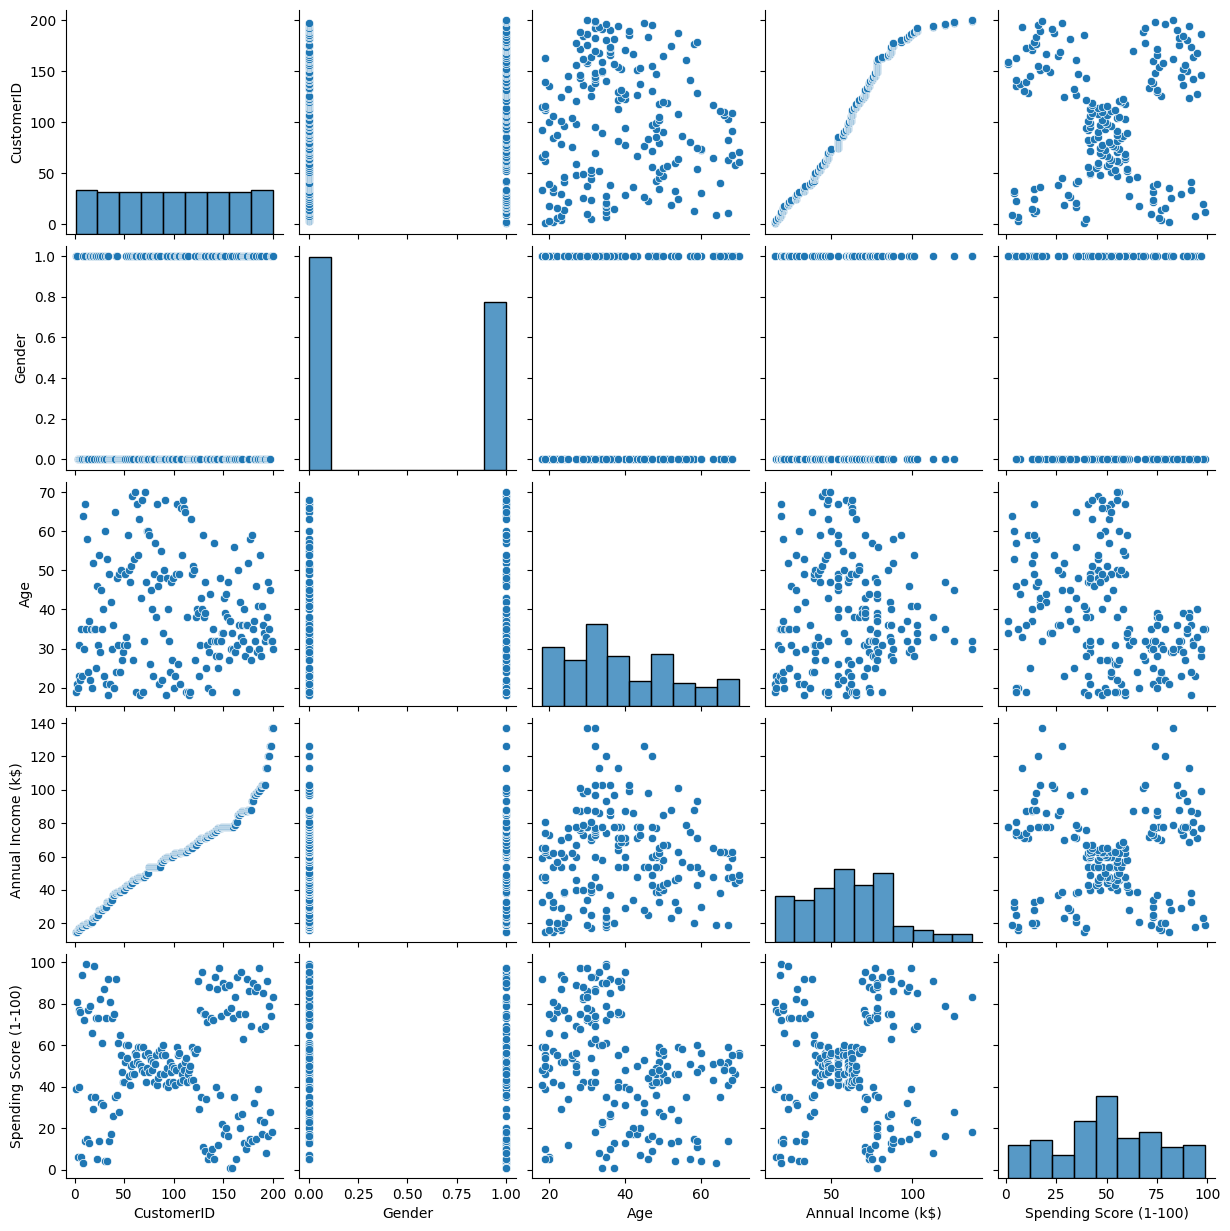

In [5]:
sns.pairplot(df)

###### From graph I found the Annual Income column and Spending Score column divide customer behavior to mostly to 5 categories , so i used only these columns to build model and to more accurate how many categoreis you divided I can use elbow method and dendogram

In [6]:
# split data
x=df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
columns=x.columns
columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
# data scalling
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler(feature_range=(0,1))
x_scl=scl.fit_transform(x)
x_scl=pd.DataFrame(x_scl)
x_scl.columns=columns
x_scl

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


### Build model

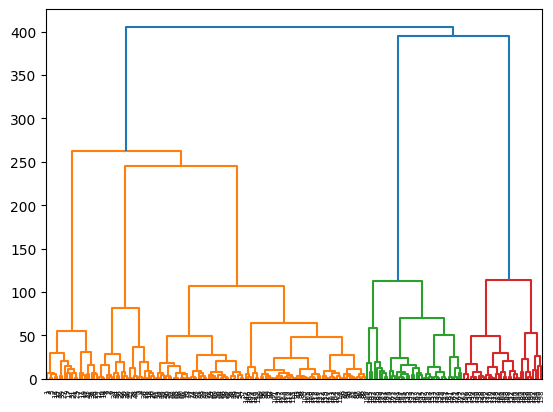

In [9]:
# In order to be sure of the number of divided groups I will use dendrogram 

from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(x, method='ward')  # You can choose different linkage methods

# Create a dendrogram
dendrogram(linkage_matrix)

# Display the dendrogram
plt.show()

In [11]:
# import KMeans class
from sklearn.cluster import KMeans
km=KMeans()
list_of_inirtias=[]
for n in range(1,20):
    km=KMeans(n_clusters=n)
    predictions=km.fit_predict(df)
    list_of_inirtias.append(km.inertia_)
    print (n,km.inertia_)

1 975512.06
2 387065.7137713771
3 271396.5629660315
4 195401.19855991466
5 157505.72072477572
6 122637.55796110154
7 103230.30299210592
8 86053.67444777445
9 77010.15905811939
10 70837.03589466089
11 64449.181530892834
12 59865.493935596576
13 55855.58695514133
14 52865.90504291031
15 50108.0437913136
16 45455.94722222222
17 44023.81969003219
18 41824.07025335776
19 39237.194769119764


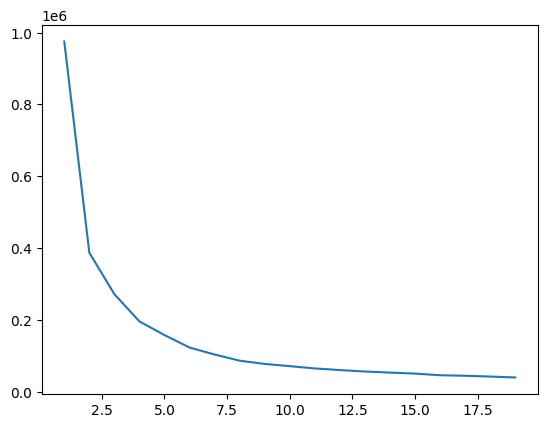

In [13]:
plt.plot(range(1,20),list_of_inirtias)

In [ ]:
# from elbow method and dedogram we found the best number of clusters is 5.

In [14]:
# take object
km=KMeans(n_clusters=5, random_state=0)
# model fit
km.fit(x_scl)
# model predict
predictions=km.predict(x_scl)

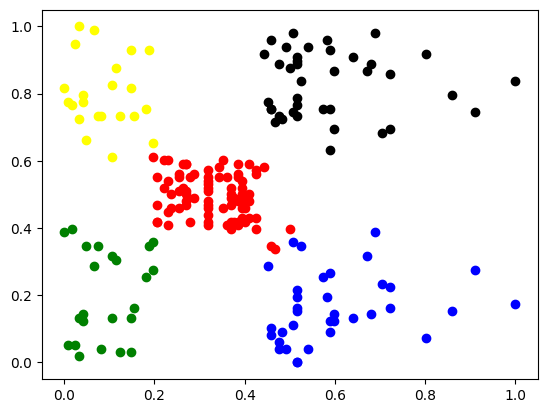

In [15]:
plt.scatter(x_scl.iloc[predictions==0,0],x_scl.iloc[predictions==0,1],color='red')
plt.scatter(x_scl.iloc[predictions==1,0],x_scl.iloc[predictions==1,1],color='blue')
plt.scatter(x_scl.iloc[predictions==2,0],x_scl.iloc[predictions==2,1],color='black')
plt.scatter(x_scl.iloc[predictions==3,0],x_scl.iloc[predictions==3,1],color='green')
plt.scatter(x_scl.iloc[predictions==4,0],x_scl.iloc[predictions==4,1],color='yellow')

In [16]:
df['Cluster ID']=predictions
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster ID
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,1
197,198,1,32,126,74,2
198,199,1,32,137,18,1


### Evalute the model

In [17]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_scl, km.labels_)
print(f"The silhouette score is: {silhouette_avg}")

The silhouette score is: 0.5594854531227246


## 2- Using DBSCAN

### build model

In [18]:
from sklearn.cluster import DBSCAN
# Initialize DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.1, min_samples=5) 
# Fit the model and predict clusters
labels = dbscan.fit_predict(x_scl)
# Add the cluster labels to your DataFrame
df['Cluster'] = labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster ID,Cluster
0,1,1,19,15,39,3,0
1,2,1,21,15,81,4,0
2,3,0,20,16,6,3,1
3,4,0,23,16,77,4,0
4,5,0,31,17,40,3,0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,-1
196,197,0,45,126,28,1,-1
197,198,1,32,126,74,2,-1
198,199,1,32,137,18,1,-1


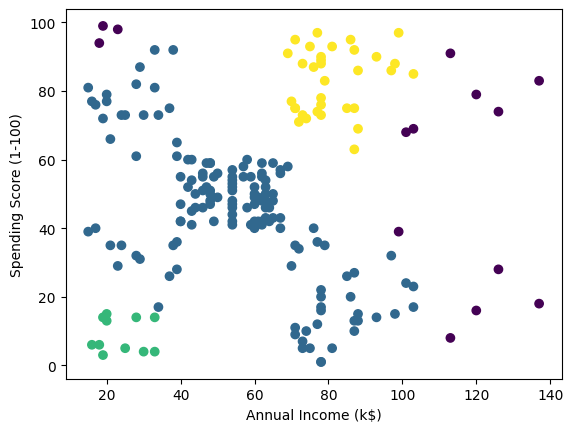

In [19]:
# Visualize the clustering results (example)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Evalute the model

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.11421508362184728


#### From building two models I found Kmeans model is more accurate than DBSCAN model because  silhouette_score of Kmeans is great than the silhouette_score of DBSCAN model that meen a high silhouette score (close to +1) indicates that the samples are well clustered and that the samples in one cluster are close to each other and far from samples in neighboring clusters.